### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* 1 min

In [2]:
dt_signal_1 = np.load('workspace/data/ica_ecg_signal_1.npy') # 1 min ppg

In [3]:
lb_list = np.load('workspace/data/ica_ecg_lb.npy')

In [4]:
data = list(dt_signal_1)

In [5]:
df = pd.DataFrame(data)

In [6]:
label = list(lb_list)

In [7]:
df['label'] = label

In [8]:
df 
# label : -1 down, 0 norm , 1 up 
# 0 norm
# -1, 1, abnorm

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,-1.638400,-1.697650,-1.727280,-1.806270,-1.648280,-0.927435,-1.282920,-1.796400,-1.984010,-2.043260,...,-3.554070,-3.573820,-3.593570,-3.623190,-3.662690,-3.662690,-3.672570,-3.672570,-3.692320,-1.0
1,0.089645,0.089645,0.069896,0.050147,0.050147,0.040273,0.020523,0.020523,0.000774,0.000774,...,0.129144,0.178517,0.158767,0.168642,0.148893,0.188391,0.198266,0.119269,0.139018,-1.0
2,0.040273,0.050147,0.050147,0.069896,0.129144,0.129144,0.129144,0.069896,0.030398,0.010649,...,0.020523,0.020523,0.010649,0.010649,-0.018975,0.218015,0.978357,0.612998,0.148893,-1.0
3,-0.325087,-0.344836,-0.364585,-0.374459,-0.394209,-0.404083,-0.404083,-0.354710,-0.394209,-0.443581,...,-0.167093,-0.127595,-0.078222,-0.018975,0.030398,0.040273,-0.018975,-0.078222,-0.097971,0.0
4,0.030398,0.020523,0.010649,0.010649,0.000774,0.010649,0.020523,0.030398,0.030398,0.020523,...,0.050147,0.040273,0.030398,0.040273,0.040273,0.069896,0.109395,0.119269,0.060022,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,-0.058473,0.000774,0.593248,1.225220,0.208140,-0.127595,-0.226341,-0.216466,-0.088097,0.000774,...,0.109395,-0.058473,-0.097971,-0.028849,0.079771,0.129144,0.109395,0.129144,0.109395,-1.0
810,0.079771,0.010649,0.030398,-0.009100,-0.028849,-0.107846,-0.157219,-0.157219,-0.048599,0.010649,...,0.978357,0.030398,-0.176968,-0.167093,-0.097971,-0.009100,-0.009100,-0.018975,-0.009100,-1.0
811,0.000774,0.060022,0.050147,0.030398,0.079771,0.514252,1.314090,0.435255,-0.028849,-0.147344,...,0.198266,0.859862,1.570830,0.632747,0.139018,0.000774,-0.048599,0.050147,0.129144,-1.0
812,0.000774,-0.028849,-0.117721,-0.147344,-0.097971,0.000774,0.119269,0.089645,0.089645,0.148893,...,-0.246090,-0.186843,-0.068348,-0.028849,-0.058473,-0.078222,0.050147,0.859862,0.879611,0.0


In [9]:
df['label'].value_counts()

 0.0    542
-1.0    255
 1.0     17
Name: label, dtype: int64

* bandpass filter

In [10]:
from scipy.signal import butter
from scipy.signal import lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs # 50, fs:100 
    low = lowcut / nyq # 0.5/50 = 1/100, lowcut: 0.5
    high = highcut / nyq # 15/50 = 30/100, highcut : 15
    # order : frequency cut wave
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# BPF setting 0.5 ~ 15 hz
lowcut = 0.5
highcut = 15

* ex

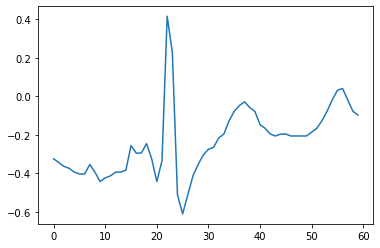

In [11]:
plt.plot(df[df['label'] == 0].iloc[0][:-1])

In [12]:
yy = butter_bandpass_filter(df[df['label'] == 0].iloc[0][:-1], lowcut, highcut, 100, order=5)

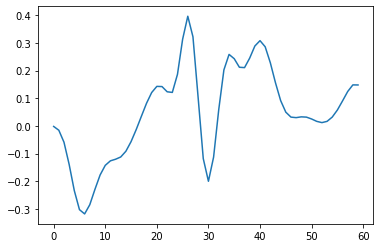

In [13]:
plt.plot(yy)

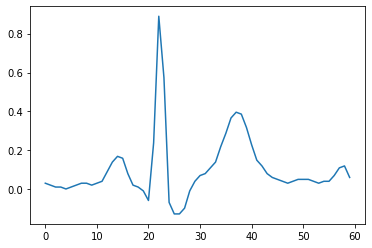

In [14]:
plt.plot(df[df['label'] == 0].iloc[1][:-1])

In [15]:
yy = butter_bandpass_filter(df[df['label'] == 0].iloc[1][:-1], lowcut, highcut, 100, order=5)

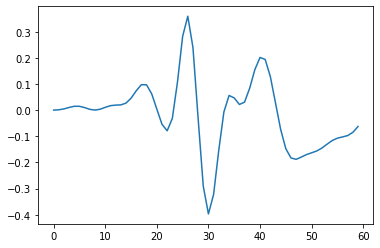

In [16]:
plt.plot(yy)

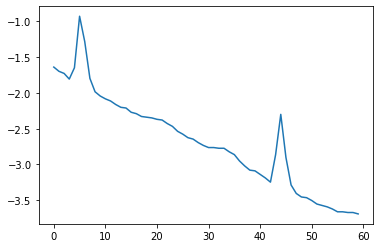

In [17]:
plt.plot(df[df['label'] == -1].iloc[0][:-1])

In [18]:
yy = butter_bandpass_filter(df[df['label'] == -1].iloc[0][:-1], lowcut, highcut, 100, order=5)

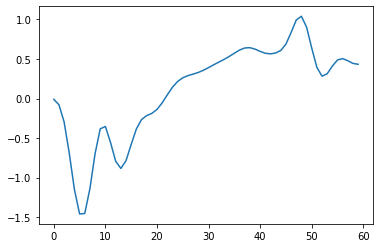

In [19]:
plt.plot(yy)

* filtering

In [20]:
dt_signal_1_bp = []
for i in dt_signal_1:
    yy = butter_bandpass_filter(i, lowcut, highcut, 100, order=5)
    dt_signal_1_bp.append(yy)

In [21]:
dt_signal_1

array([[-1.63839996e+00, -1.69764996e+00, -1.72728002e+00, ...,
        -3.67256999e+00, -3.67256999e+00, -3.69232011e+00],
       [ 8.96454006e-02,  8.96454006e-02,  6.98963031e-02, ...,
         1.98266000e-01,  1.19268999e-01,  1.39017999e-01],
       [ 4.02726009e-02,  5.01471013e-02,  5.01471013e-02, ...,
         9.78357017e-01,  6.12998009e-01,  1.48892999e-01],
       ...,
       [ 7.74296990e-04,  6.00216985e-02,  5.01471013e-02, ...,
        -4.85985987e-02,  5.01471013e-02,  1.29143998e-01],
       [ 7.74296990e-04, -2.88494006e-02, -1.17720999e-01, ...,
         5.01471013e-02,  8.59862030e-01,  8.79611015e-01],
       [ 7.74296990e-04,  7.74296990e-04,  1.06488997e-02, ...,
        -2.88494006e-02, -2.88494006e-02, -2.88494006e-02]])

In [22]:
dt_signal_1_bp

[array([-0.00989493, -0.0791516 , -0.29549267, -0.69157767, -1.15110821,
        -1.45915477, -1.45433138, -1.14055096, -0.69825513, -0.38354219,
        -0.35347064, -0.55635394, -0.79326746, -0.88438939, -0.78607584,
        -0.58114187, -0.38603663, -0.26663518, -0.21632776, -0.18782836,
        -0.13841997, -0.05541374,  0.04628278,  0.14228188,  0.21547332,
         0.26227287,  0.28962916,  0.30867831,  0.32935329,  0.35697891,
         0.39097571,  0.42682838,  0.46101947,  0.49467754,  0.53174339,
         0.57308406,  0.61250552,  0.63889825,  0.64316444,  0.62516552,
         0.59595988,  0.57224317,  0.56518598,  0.57535841,  0.6074075 ,
         0.68771524,  0.83454078,  0.99260508,  1.04052748,  0.90314227,
         0.63851954,  0.39337032,  0.28240009,  0.31368485,  0.41077256,
         0.48758155,  0.50509163,  0.47766384,  0.44391959,  0.43345489]),
 array([ 5.41403148e-04,  4.31121739e-03,  1.58829723e-02,  3.60880106e-02,
         5.67192568e-02,  6.50646514e-02,  5.4

### Autoencoder

In [23]:
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd

import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [24]:
data = list(dt_signal_1_bp)

In [25]:
label = list(lb_list)

In [26]:
df = pd.DataFrame(data)

In [27]:
df['label'] = label

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,-0.009895,-0.079152,-0.295493,-0.691578,-1.151108,-1.459155,-1.454331,-1.140551,-0.698255,-0.383542,...,0.393370,0.282400,0.313685,0.410773,0.487582,0.505092,0.477664,0.443920,0.433455,-1.0
1,0.000541,0.004311,0.015883,0.036088,0.056719,0.065065,0.054959,0.031671,0.006449,-0.012069,...,-0.028749,-0.004864,0.026596,0.059168,0.084323,0.094916,0.090245,0.077379,0.064592,-1.0
2,0.000243,0.001996,0.007664,0.018574,0.032892,0.047633,0.061916,0.075294,0.083040,0.076265,...,0.098269,0.063957,0.020527,-0.016645,-0.037013,-0.039118,-0.020034,0.043615,0.178607,-1.0
3,-0.001963,-0.015753,-0.059099,-0.139280,-0.234218,-0.303072,-0.318528,-0.285287,-0.229706,-0.177694,...,0.016375,0.011898,0.016431,0.031907,0.057590,0.090523,0.124507,0.148412,0.148129,0.0
4,0.000184,0.001402,0.004892,0.010362,0.014835,0.014805,0.009752,0.003205,0.000266,0.003535,...,-0.156164,-0.144935,-0.130163,-0.116266,-0.107173,-0.102461,-0.097157,-0.084855,-0.062536,0.0


In [29]:
df['label'] = df['label'].map(lambda x : True if x == 0 else False)

* Remove NaN

In [30]:
df_drop = df.dropna()

* Train

In [31]:
df_norm = df_drop[df_drop['label']==True]

* Only Test

In [32]:
df_ano = df_drop[df_drop['label']!=True]

In [33]:
df_norm

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
3,-0.001963,-0.015753,-0.059099,-0.139280,-0.234218,-0.303072,-0.318528,-0.285287,-0.229706,-0.177694,...,0.016375,0.011898,0.016431,0.031907,0.057590,0.090523,0.124507,0.148412,0.148129,True
4,0.000184,0.001402,0.004892,0.010362,0.014835,0.014805,0.009752,0.003205,0.000266,0.003535,...,-0.156164,-0.144935,-0.130163,-0.116266,-0.107173,-0.102461,-0.097157,-0.084855,-0.062536,True
5,0.001555,0.012742,0.048996,0.118737,0.205213,0.269577,0.275792,0.214467,0.108203,-0.002657,...,-0.032679,-0.112359,-0.154512,-0.161674,-0.149145,-0.133633,-0.124016,-0.118946,-0.111687,True
6,0.000184,0.001402,0.005011,0.011312,0.018480,0.023941,0.026759,0.028497,0.032422,0.042221,...,-0.056252,-0.028306,0.000400,0.017200,0.007499,-0.032043,-0.087124,-0.132947,-0.141589,True
7,-0.001248,-0.013394,-0.064898,-0.191843,-0.394297,-0.608909,-0.745621,-0.755381,-0.660805,-0.530381,...,0.352353,0.361458,0.337327,0.330871,0.368711,0.440919,0.514453,0.555061,0.543227,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,0.002688,0.021288,0.078330,0.179194,0.287058,0.341030,0.304476,0.193001,0.059848,-0.040917,...,-0.443095,-0.318408,-0.206155,-0.143595,-0.108123,-0.054883,0.041218,0.168142,0.287256,True
794,-0.000174,-0.001387,-0.005150,-0.011958,-0.019693,-0.024727,-0.024851,-0.020911,-0.015903,-0.012581,...,0.008993,0.008492,0.007951,0.007156,0.005811,0.003936,0.001951,0.000503,0.000360,True
795,-0.000174,-0.001387,-0.005150,-0.011958,-0.019693,-0.024727,-0.024851,-0.020851,-0.015487,-0.011294,...,0.006983,0.006797,0.006977,0.007604,0.008135,0.007835,0.006402,0.004488,0.003368,True
796,-0.000174,-0.001387,-0.005150,-0.011958,-0.019693,-0.024787,-0.025266,-0.022139,-0.017818,-0.013941,...,0.009578,0.008490,0.007647,0.007220,0.007041,0.006842,0.006470,0.005943,0.005375,True


In [34]:
raw_data_norm = df_norm.values

In [35]:
raw_data_ano = df_ano.values

* Norm : for train

In [36]:
labels = raw_data_norm[:, -1]
data = raw_data_norm[:, 0:-1]

* AbNorm

In [37]:
labels_ano = raw_data_ano[:, -1]
data_ano = raw_data_ano[:, 0:-1]

* train test split

In [38]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

In [39]:
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

(423, 60) (423,) (106, 60) (106,)


In [40]:
# minmaxnormalization
min_val = tf.reduce_min(np.float32(train_data))
# max
max_val = tf.reduce_max(np.float32(train_data))
# min
min_val_ano = tf.reduce_min(np.float32(data_ano))
# min
max_val_ano = tf.reduce_max(np.float32(data_ano))

2022-11-22 06:31:40.239510: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 06:31:40.243169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 06:31:40.243241: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 06:31:40.243718: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [41]:
train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)
test_ano = (data_ano - min_val_ano) / (max_val_ano - data_ano)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)
test_ano = tf.cast(test_ano, tf.float32)

In [42]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()

    self.encoder = tf.keras.Sequential([
      layers.Dense(60, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu"),
      layers.Dense(4, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(60, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()


In [43]:
autoencoder.compile(optimizer='adam', loss='mae')

In [44]:
history = autoencoder.fit(train_data, train_data, 
          epochs=500, 
          batch_size=64,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/500
7/7 [==============================] - 1s 12ms/step - loss: 0.0607 - val_loss: 0.0609
Epoch 2/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0589 - val_loss: 0.0592
Epoch 3/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0572 - val_loss: 0.0575
Epoch 4/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0555 - val_loss: 0.0558
Epoch 5/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0538 - val_loss: 0.0541
Epoch 6/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0521 - val_loss: 0.0524
Epoch 7/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0504 - val_loss: 0.0507
Epoch 8/500
1/7 [===>..........................] - ETA: 0s - loss: 0.0494

2022-11-22 06:31:42.741472: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


7/7 [==============================] - 0s 3ms/step - loss: 0.0487 - val_loss: 0.0491
Epoch 9/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0470 - val_loss: 0.0474
Epoch 10/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0453 - val_loss: 0.0457
Epoch 11/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0436 - val_loss: 0.0441
Epoch 12/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0419 - val_loss: 0.0424
Epoch 13/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0403 - val_loss: 0.0408
Epoch 14/500
7/7 [==============================] - 0s 2ms/step - loss: 0.0386 - val_loss: 0.0391
Epoch 15/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0370 - val_loss: 0.0375
Epoch 16/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0353 - val_loss: 0.0359
Epoch 17/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0337 - val_loss: 0.0343
Epoch 18/500
7/7 [================

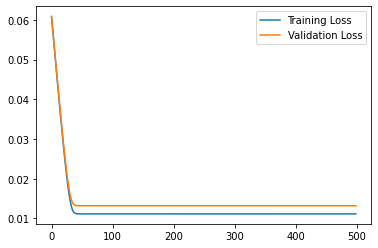

In [45]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [46]:
encoded_imgs = autoencoder.encoder(test_data).numpy()
# noral_test_data : latent vector
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

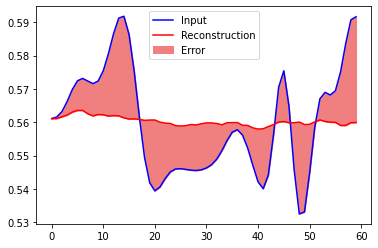

In [47]:
plt.plot(test_data[0], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[0], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[0], test_data[0], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

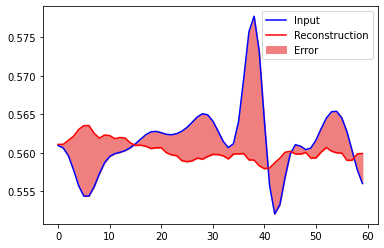

In [48]:
plt.plot(test_data[1], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[1], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[1], test_data[1], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

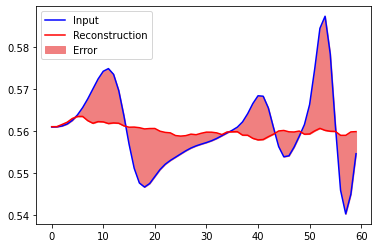

In [49]:
plt.plot(test_data[2], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[2], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[2], test_data[2], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

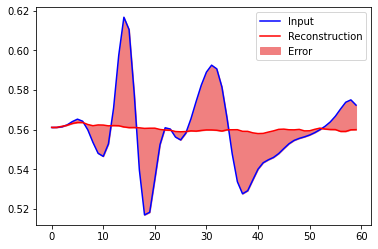

In [50]:
plt.plot(test_data[33], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[33], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[33], test_data[33], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

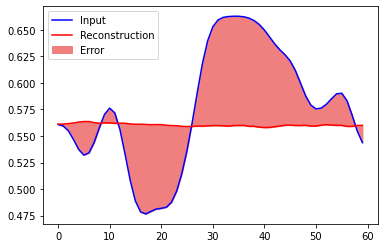

In [51]:
plt.plot(test_data[50], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[50], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[50], test_data[50], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [56]:
encoded_imgs = autoencoder.encoder(test_ano).numpy()
# noral_test_data를 encoder에 입력 : latent vector
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

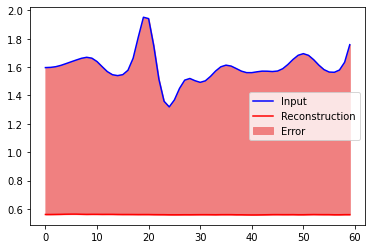

In [57]:
plt.plot(test_ano[2], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[2], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[2], test_ano[2], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

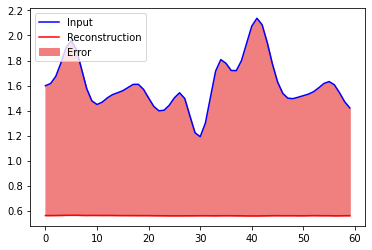

In [58]:
plt.plot(test_ano[3], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[3], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[3], test_ano[3], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

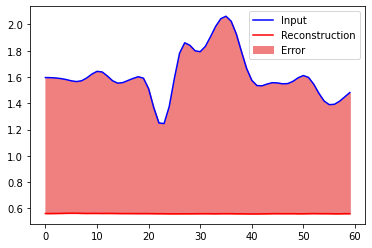

In [59]:
plt.plot(test_ano[4], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[4], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[4], test_ano[4], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

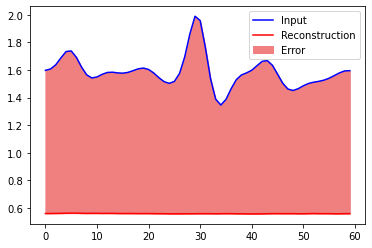

In [60]:
plt.plot(test_ano[44], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[44], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[44], test_ano[44], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

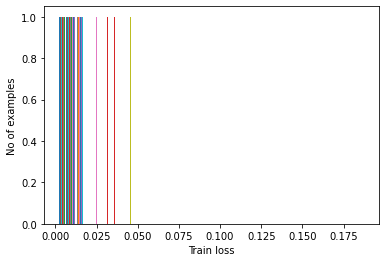

In [61]:
reconstructions = autoencoder.predict(test_data)
test_loss = tf.keras.losses.mae(reconstructions, test_data)
# 정상데이터와 복원한 데이터의 mae

plt.hist(test_loss)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [62]:
threshold = np.mean(test_loss) + 2.4 * np.std(test_loss)
print("Threshold: ", threshold)

Threshold:  0.06311271488666534


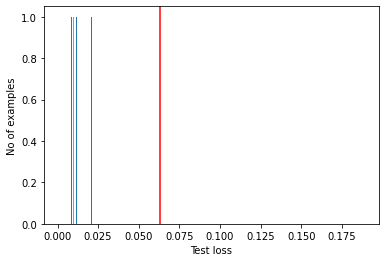

In [63]:
plt.hist(test_loss, bins=30)
plt.xlabel('Test loss')
plt.ylabel('No of examples')
plt.axvline(x=threshold, ymin=0.0, ymax=80, c='red')

plt.show()


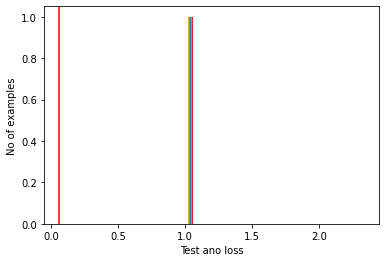

In [65]:
reconstructions_ano = autoencoder.predict(test_ano)
# 비정상 데이터
test_loss_ano = tf.keras.losses.mae(reconstructions_ano, test_ano)
# 비정상 데이터와 그 복원 데이터의 mae

plt.hist(test_loss_ano, bins=30)
plt.xlabel('Test ano loss')
plt.ylabel('No of examples')
plt.axvline(x=threshold, ymin=0.0, ymax=80, c='red')

plt.show()

* test

In [66]:
test_ano

<tf.Tensor: shape=(250, 60), dtype=float32, numpy=
array([[1.5875754, 1.5302218, 1.3663788, ..., 2.078891 , 2.0389552,
        2.02678  ],
       [1.5964441, 1.5996628, 1.6095924, ..., 1.6752574, 1.6636612,
        1.652235 ],
       [1.59619  , 1.5976856, 1.6025318, ..., 1.5790172, 1.6337011,
        1.7577149],
       ...,
       [1.5963933, 1.5989002, 1.6054229, ..., 1.4646548, 1.3221009,
        1.3374363],
       [1.5959867, 1.5963193, 1.5984808, ..., 2.3597348, 2.010106 ,
        1.5859193],
       [1.5959867, 1.5960143, 1.5961514, ..., 1.5518701, 1.5672237,
        1.5757996]], dtype=float32)>

In [67]:
test_data

<tf.Tensor: shape=(106, 60), dtype=float32, numpy=
array([[0.5610902 , 0.5615987 , 0.5632156 , ..., 0.58360827, 0.5907017 ,
        0.5916346 ],
       [0.560972  , 0.56064624, 0.5596358 , ..., 0.5603016 , 0.5578255 ,
        0.5560249 ],
       [0.56102514, 0.5610754 , 0.5612659 , ..., 0.54029745, 0.54501414,
        0.5546534 ],
       ...,
       [0.5610902 , 0.5616046 , 0.56328624, ..., 0.54331684, 0.5427276 ,
        0.5463954 ],
       [0.5612555 , 0.562892  , 0.56785077, ..., 0.5560082 , 0.55685705,
        0.55958325],
       [0.56102514, 0.5610754 , 0.5612482 , ..., 0.5540486 , 0.5535478 ,
        0.5558337 ]], dtype=float32)>

In [68]:
test_concat = tf.concat([test_ano, test_data], 0)

In [69]:
test_concat_label = np.concatenate([labels_ano, test_labels], 0)

In [70]:
test_concat_label

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [71]:
def predict(model, data, threshold):
    # model, data, threshold input
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    # mae
    return tf.math.less(loss, threshold)
    #  loss < threshold : Normal

In [72]:
def print_stats(preds, labels):
    print('Accuracy = {}'.format(accuracy_score(labels, preds)))
    print('Precision = {}'.format(precision_score(labels, preds)))
    print('Recall = {}'.format(recall_score(labels, preds)))
    print('Confusion Matrix = {}'.format(confusion_matrix(labels, preds)))

In [73]:
reconstructions = autoencoder(test_concat)
loss = tf.keras.losses.mae(reconstructions, test_concat)

In [74]:
preds = predict(autoencoder, test_concat, threshold)

In [75]:
preds = preds.numpy()

In [76]:
def bi2num(x):
    if x == True:
        return 1
    else:
        return 0

In [77]:
preds_ans = []
for i in preds:
    preds_ans.append(bi2num(i))

In [78]:
test_concat_label_ans = []
for i in test_concat_label:
    test_concat_label_ans.append(bi2num(i))

In [79]:
print_stats(preds_ans, test_concat_label_ans)

Accuracy = 0.9943820224719101
Precision = 1.0
Recall = 0.9811320754716981
Confusion Matrix = [[250   0]
 [  2 104]]
